In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import os

In [2]:
hb = pd.read_csv('hotel_bookings.csv')

In [3]:
hb.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
hb.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
hb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
hb.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


 ### melihat data yang hilang

perc_missing_data = pd.DataFrame([hb.isnull().sum(),hb.isnull().sum()*100.0/hb.shape[0]]).T
perc_missing_data.columns = ['No. of Missing Data', '% Missing Data']
perc_missing_data

#### 0,003% rows memiliki informasi yang hilang untuk anak-anak. Mari kita lihat distribusi anak-anak untuk mengisi informasi yang hilang

In [8]:
hb['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

#### Sebagian besar pemesanan tidak memiliki anak dan karenanya saya akan mengisi baris yang hilang untuk anak-anak dengan value 0

In [10]:
hb['children'].fillna(0,inplace=True)

#### 0,4% dari rows memiliki informasi yang hilang untuk Country. jadi saya lihat distribusi Country untuk mengisi informasi yang hilang

In [11]:
perc_country_data = pd.DataFrame([hb['country'].value_counts(),hb['country'].value_counts()*100/hb.shape[0]]).T
perc_country_data.columns = ['Count', '% Distribution']
perc_country_data

,Count,% Distribution
PRT,48590.0,40.698551
GBR,12129.0,10.159142
FRA,10415.0,8.723511
ESP,8568.0,7.176480
DEU,7287.0,6.103526
...,...,...
CYM,1.0,0.000838
MRT,1.0,0.000838
BDI,1.0,0.000838
SMR,1.0,0.000838


#### 40,7% pemesanan berasal dari Portugal. Hanya 0,4% informasi yang hilang. saya akan mengisi baris *Country* yang hilang sebagai *Portugal* karena distribusinya tidak akan banyak berubah dan saya masih bisa menyimpan data dan membuang row.

In [12]:
hb['country'].fillna('PRT',inplace=True)

#### 13% agent ID dan 94% company ID tidak ada. memungkinkan untuk mecari lebih jauh ke dalam rincian dataset untuk menemukan kerelasi infromasi yang hilang dalam agent ID dan company ID vs fitur lain seperti market segment, distribution channel dll; Misalkan sebagian besar pemesanan langsung tidak memiliki agent ID atau company ID dan informasinya mungkin batal. oleh karna itu dimungkinkan untuk mengisi value yang hilang berdasarkan fitur lain namun untuk kesederhanaan saya akan menjatuhkan dua colomns.

In [13]:
hb.drop(['agent','company'],axis=1,inplace=True)

In [14]:
perc_missing_data = pd.DataFrame([hb.isnull().sum(),hb.isnull().sum()*100.0/hb.shape[0]]).T
perc_missing_data.columns = ['No. of Missing Data', '% Missing Data']
perc_missing_data

,No. of Missing Data,% Missing Data
hotel,0.0,0.0
is_canceled,0.0,0.0
lead_time,0.0,0.0
arrival_date_year,0.0,0.0
arrival_date_month,0.0,0.0
arrival_date_week_number,0.0,0.0
arrival_date_day_of_month,0.0,0.0
stays_in_weekend_nights,0.0,0.0
stays_in_week_nights,0.0,0.0
adults,0.0,0.0


## DATA VISUALIZATION


In [15]:
plt.style.use('fivethirtyeight')

#### distribusi pemesanan hotel dan saya pisahkan berdasarkan status pembatalannya

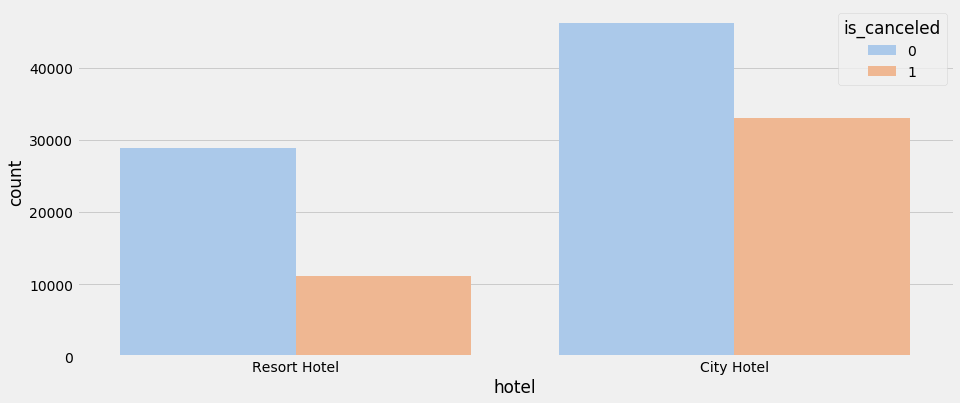

In [19]:
plt.figure(figsize=(14,6))
sns.countplot(x='hotel',data=hb,hue='is_canceled',palette='pastel')
plt.show()

#### Sekitar 25% pemesanan hotel resor telah dibatalkan dan sekitar 40% pemesanan hotel kota telah dibatalkan. Angka-angka ini tinggi dan memiliki implikasi potensial dalam pendapatan untuk hotel

###  jenis deposit type vs cancellation status


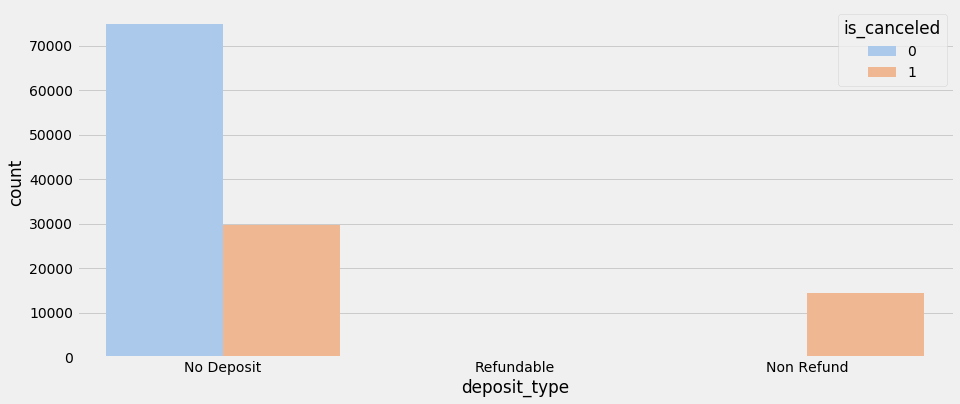

In [20]:
plt.figure(figsize=(14,6))
sns.countplot(x='deposit_type',data=hb,hue='is_canceled',palette='pastel')
plt.show()

#### Sekitar 30k pemesanan jenis deposit 'No Deposit' dibatalkan. Jumlah ini sangat besar jika hotel tidak dapat mengganti pemesanan yang dibatalkan tepat waktu. Ini kerugian besar bagi hotel. Tetapi di bagian selanjutnya, kita akan melihat tanggal pembatalan vs tanggal kedatangan untuk memahami dampak pembatalan dan berapa banyak waktu yang harus disiapkan hotel untuk pembatalan

#### Logikanya orang akan berasumsi bahwa deposit yang dapat dikembalikan memiliki lebih banyak pembatalan karena tarif hotel biasanya lebih tinggi untuk kamar tipe deposit yang dapat dikembalikan dan pelanggan membayar lebih untuk mengantisipasi pembatalan

## Date of Cancellation vs Date of Arrival


#### Saya perlu membuat kolom baru bernama arrival_date yang menggabungkan tanggal kedatangan tahun, bulan dan tanggal. kemudian saya membandingkan arrival_date dengan tanggal pembatalan untuk mengetahui bagaimana pembatalan terjadi. Tanggal pembatalan dapat diidentifikasi dari reservation_status_date untuk reservation_status = Dibatalkan

In [26]:
hb['arrival_date'] = hb['arrival_date_year'].astype(str) + '-' + hb['arrival_date_month'] + '-' + hb['arrival_date_day_of_month'].astype(str)
hb['arrival_date'] = hb['arrival_date'].apply(pd.to_datetime)
hb['reservation_status_date'] = hb['reservation_status_date'].apply(pd.to_datetime)

#### Buat kerangka data baru untuk pemesanan yang dibatalkan yang disebut cancelled_data. Tambahkan kolom baru yang disebut canc_to_arrival_days yaitu perbedaan antara tanggal pembatalan dan tanggal kedatangan arrival

In [27]:
cancelled_data = hb[hb['reservation_status'] == 'Canceled']
cancelled_data['canc_to_arrival_days'] = cancelled_data['arrival_date'] - cancelled_data['reservation_status_date']
cancelled_data['canc_to_arrival_days'] = cancelled_data['canc_to_arrival_days'].dt.days

C:\Users\Sir.John\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Sir.John\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


###  visualize distribution of days from cancellation to arrival


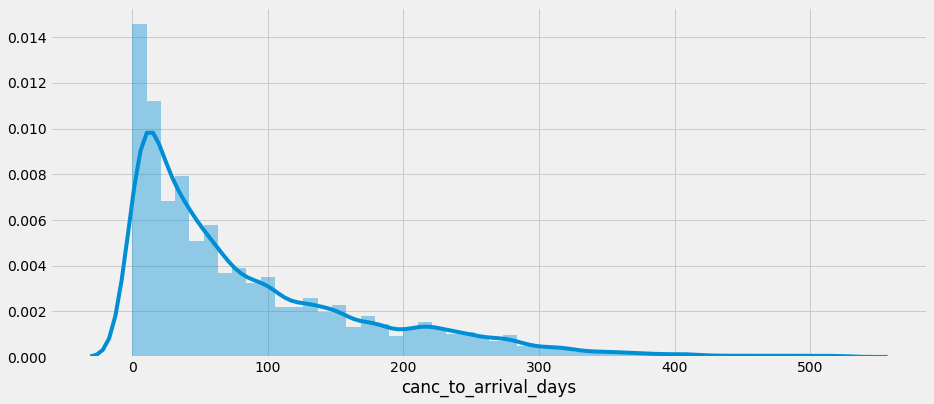

In [28]:
plt.figure(figsize=(14,6))
sns.distplot(cancelled_data['canc_to_arrival_days'])
plt.show()

#### Dengan asumsi hotel dapat secara memadai mengganti reservasi yang dibatalkan dalam satu minggu, saya hanya tertarik pada pembatalan yang terjadi kurang dari seminggu hingga tanggal kedatangan yang menanggung biaya keuangan ke hotel

In [29]:
print('Percentage of cancellations that are within a week of arrival: ', 
      (cancelled_data[cancelled_data['canc_to_arrival_days']<=7]['canc_to_arrival_days'].count()*100/cancelled_data['canc_to_arrival_days'].count()).round(2), '%')

Percentage of cancellations that are within a week of arrival:  11.94 %


12% pembatalan terjadi kurang dari seminggu. Ada manfaat besar untuk memprediksi jika pelanggan akan membatalkan pemesanan sehingga hotel dapat mempersiapkannya secara memadai.

### memvisualisasikan fitur lain untuk memiliki gagasan tentang dataset

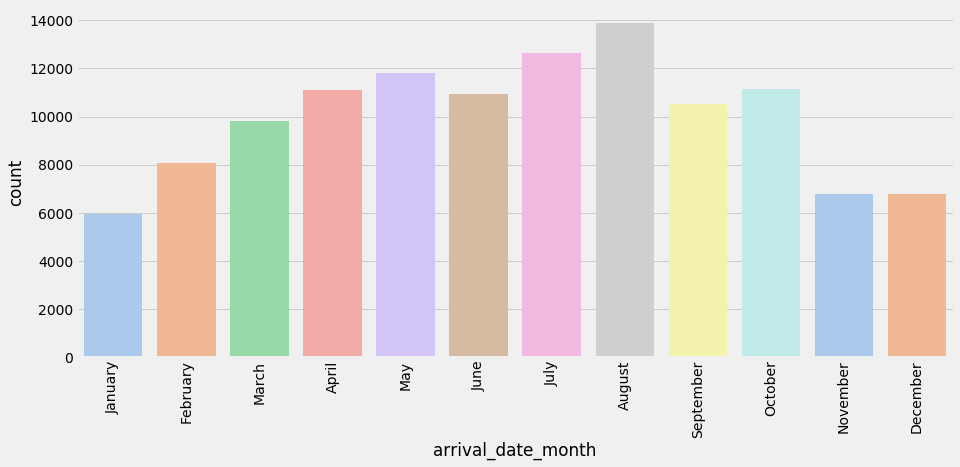

In [33]:
month_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.figure(figsize=(14,6))
sns.countplot(hb['arrival_date_month'], palette='pastel', order = month_sorted)
plt.xticks(rotation = 90)
plt.show()

#### Sepertinya bulan-bulan musim panas Mei-Agustus memiliki permintaan tertinggi. Bulan-bulan musim dingin November-Februari memiliki permintaan terendah. Sekarang mari kita lihat bulan mana yang memiliki pembatalan tertinggi karena target saya adalah pembatalan

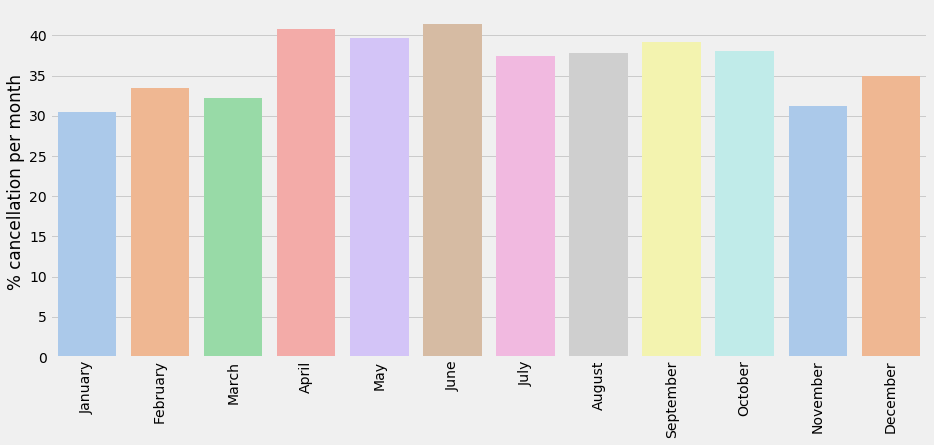

In [45]:
perc_monthly_canc = pd.DataFrame(hb[hb['is_canceled'] == 1]['arrival_date_month'].value_counts() * 100 / hb['arrival_date_month'].value_counts())
perc_monthly_canc.reset_index()
plt.figure(figsize=(14,6))
sns.barplot(x=perc_monthly_canc.index,y='arrival_date_month',data=perc_monthly_canc, order=month_sorted, palette='pastel')
plt.xticks(rotation = 90)
plt.ylabel('% cancellation per month')
plt.show()

#### Tidak ada perbedaan signifikan dalam pembatalan persentase antara bulan namun bulan permintaan terendah memiliki % pembatalan terendah dan bulan permintaan tertinggi memiliki% pembatalan tertinggi. Hotel-hotel akan menerima tren ini karena mengisi kamar yang dibatalkan selama musim ramai menjadi lebih mudah.

### market segment vs cancellation

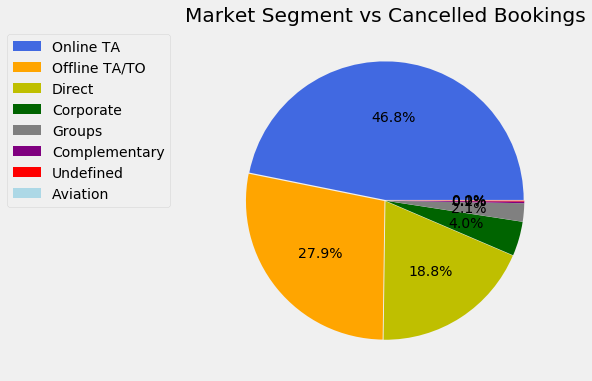

In [46]:
plt.figure(figsize=(8,8))
explode = [0.005] * len(cancelled_data['market_segment'].unique())
colors = ['royalblue','orange','y','darkgreen','gray','purple','red','lightblue']
plt.pie(cancelled_data['market_segment'].value_counts(),
       autopct = '%.1f%%',
       explode = explode,
       colors = colors)
plt.legend(cancelled_data['market_segment'].unique(), bbox_to_anchor=(-0.1, 1.),
           fontsize=14)
plt.title('Market Segment vs Cancelled Bookings')
plt.tight_layout()
plt.show()

#### Sekitar 65% dari pemesanan yang dibatalkan adalah oleh agen perjalanan atau tour operator

#### Sejauh ini kami telah melihat beberapa fitur dan merencanakan distribusi umum dan bagaimana mereka berperilaku terhadap pembatalan. Sekarang mari kita lihat seluruh rangkaian fitur dan lihat bagaimana mereka berkorelasi dengan status pembatalan. Langkah ini akan membantu saya memilih fitur untuk model ini

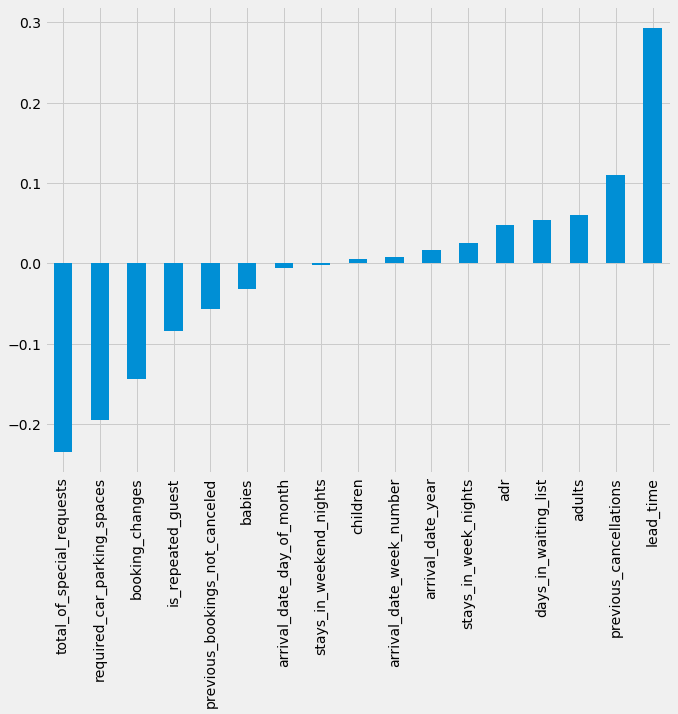

In [48]:
plt.figure(figsize=(10,8))
hb.corr()['is_canceled'].sort_values()[:-1].plot(kind='bar')
plt.show()

#### Korelasi hanya terjadi dengan nilai numerik. Mari kita lihat distribusi beberapa variabel kategori yang belum kita bahas di bagian sebelumnya untuk memutuskan mana dari yang ingin saya bawa untuk model.

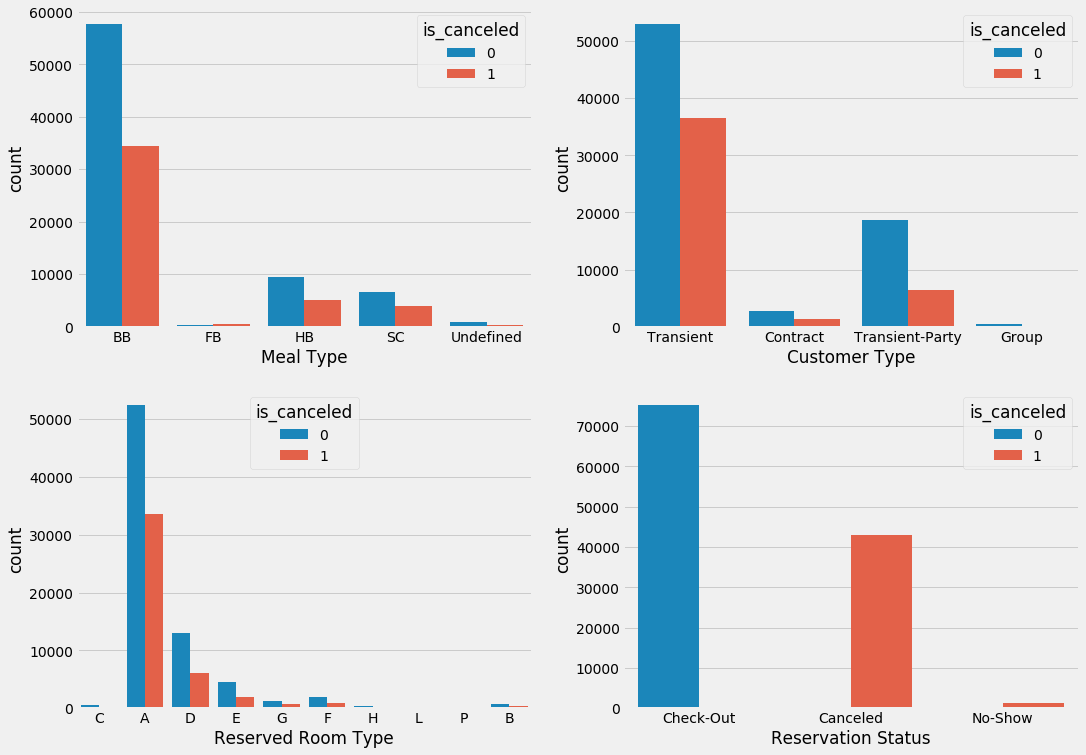

In [51]:
plt.figure(figsize=(16,12))
plt.subplot(221)
sns.countplot(hb['meal'], hue=hb['is_canceled'])
plt.xlabel('Meal Type')
plt.subplot(222)
sns.countplot(hb['customer_type'], hue=hb['is_canceled'])
plt.xlabel('Customer Type')
plt.subplot(223)
sns.countplot(hb['reserved_room_type'], hue=hb['is_canceled'])
plt.xlabel('Reserved Room Type')
plt.subplot(224)
sns.countplot(hb['reservation_status'], hue=hb['is_canceled'])
plt.xlabel('Reservation Status')
plt.show()

#### Jelas bahwa jenis makanan dan jenis kamar yang dipesan tidak memiliki pemesanan yang didistribusikan secara merata. Dalam kedua fitur, pemesanan sangat mendukung satu kategori dan karenanya saya akan menjatuhkan kedua kolom. saya akan menghapus jenis setoran (divisualisasikan sebelumnya) dengan alasan yang sama

#### saya akan menjaga fitur tipe pelanggan dan mengonversi ke variabel dummy.
#### Fitur status reservasi pada dasarnya adalah variabel target. Untuk menghindari kebocoran data, saya juga akan menghapus kolom ini.
#### Ada terlalu banyak negara dan akan menambah banyak dimensi saat dikonversi ke variabel dummy. saya akan menjatuhkan kolom ini juga. (CATATAN - kita bisa menjatuhkan ini pada tahap pengisian data yang hilang itu sendiri)
#### saya juga akan menghapus semua fitur tanggal.
#### saya akan mengonversi fitur kategori lainnya yang telah kami visualisasikan di bagian sebelumnya berdasarkan intuisi.



#### CONVERTING CATEGORICAL COLUMNS TO DUMMY VARIABLES AND DROPPING UNNECESSARY COLUMNS

In [52]:
data = hb.drop(['meal','country','reserved_room_type','assigned_room_type','deposit_type','reservation_status','reservation_status_date','arrival_date'], axis=1)
data = pd.concat([data, 
                 pd.get_dummies(data['hotel'], drop_first=True), 
                 pd.get_dummies(data['arrival_date_month'], drop_first=True), 
                 pd.get_dummies(data['market_segment'], drop_first=True),
                 pd.get_dummies(data['distribution_channel'], drop_first=True),
                 pd.get_dummies(data['customer_type'], drop_first=True)
                 ], axis=1)
data = hb.drop(['hotel','arrival_date_month','market_segment','distribution_channel','customer_type'], axis=1)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   is_canceled                     119390 non-null  int64         
 1   lead_time                       119390 non-null  int64         
 2   arrival_date_year               119390 non-null  int64         
 3   arrival_date_week_number        119390 non-null  int64         
 4   arrival_date_day_of_month       119390 non-null  int64         
 5   stays_in_weekend_nights         119390 non-null  int64         
 6   stays_in_week_nights            119390 non-null  int64         
 7   adults                          119390 non-null  int64         
 8   children                        119390 non-null  float64       
 9   babies                          119390 non-null  int64         
 10  meal                            119390 non-null  object 

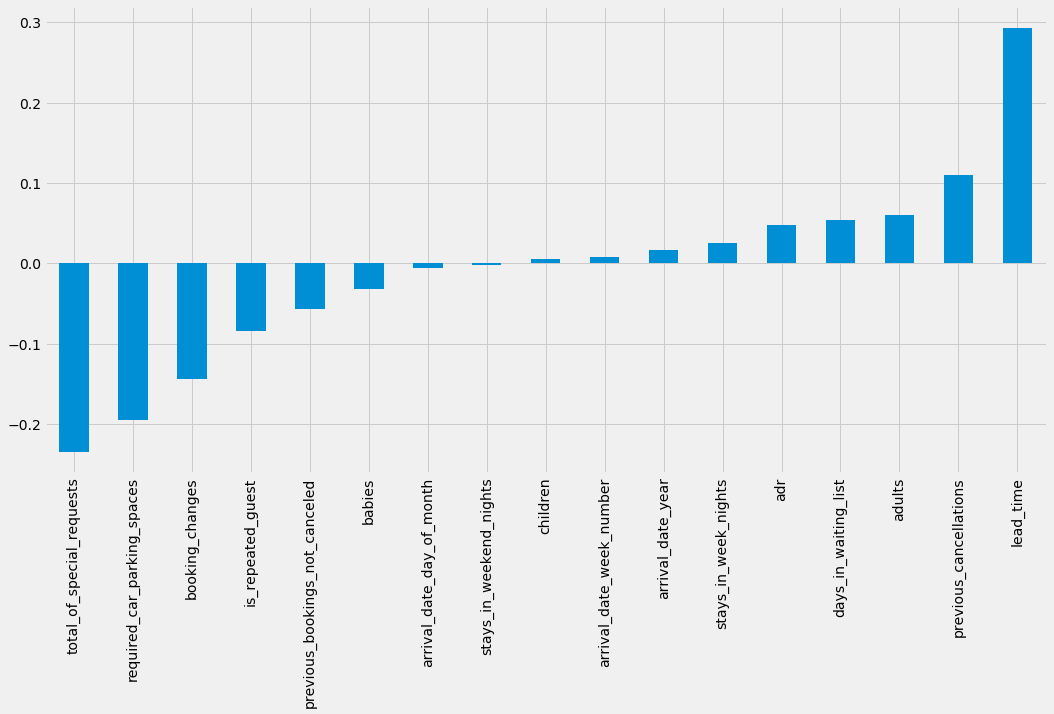

In [54]:
plt.figure(figsize=(16,8))
data.corr()['is_canceled'].sort_values()[:-1].plot(kind='bar')
plt.show()

#### MODELING

#### Split into training and test sets


In [55]:
X = hb.iloc[:, 1:].values
y = hb.iloc[:, 0].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#### Feature Scaling


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Functions and Variable Assignments


In [ ]:
# Empty dictionary of model accuracy results
model_accuracy_results = {}

# Function for calculating accuracy from confusion matrix
from sklearn.metrics import confusion_matrix
def model_accuracy(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = ((cm[0,0] + cm [1,1]) * 100 / len(y_test)).round(2)
    return accuracy

#### Baseline Model - We will take the class that has most observations in the training set and applying it as the predicted result and compute accuracy


In [ ]:
# Baseline model
(unique, counts) = np.unique(y_train, return_counts=True)
if counts[0]  > counts[1]:
    idx = 0
else:
    idx = 1

# Applying baseline results to y_pred
if idx == 0:
    y_pred = np.zeros(y_test.shape)
else:
    y_pred = np.ones(y_test.shape)

# Computing accuracy
model_accuracy_results['Baseline'] = model_accuracy(y_test, y_pred)

#### Logistic Regression¶

In [ ]:
# Fit and train
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=250)
classifier.fit(X_train, y_train)

# Predict
y_pred = classifier.predict(X_test)

# Computing accuracy
model_accuracy_results['LogisticRegression'] = model_accuracy(y_test, y_pred)

#### K Nearest Neighbors


In [ ]:
# Fit and train
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(X_train,y_train)

# Predict
y_pred = classifier.predict(X_test)

# Computing accuracy
model_accuracy_results['KNearestNeighbors'] = model_accuracy(y_test, y_pred)

#### SVM

In [ ]:
# Fit and train
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state=0)
classifier.fit(X_train,y_train)

# Predict
y_pred = classifier.predict(X_test)

# Computing accuracy
model_accuracy_results['SVM'] = model_accuracy(y_test, y_pred)

#### RandomForest

In [ ]:
# Fit and train
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)

# Predict
y_pred = classifier.predict(X_test)

# Computing accuracy
model_accuracy_results['RandomForest'] = model_accuracy(y_test, y_pred)